# **1. Introduction**


## Modeling

In this section, our focus shifts to the exciting world of modeling, where we aim to develop and evaluate machine learning models capable of predicting nightly prices. This step involves careful consideration of the dataset's features to choose appropriate algorithms, followed by the construction and evaluation of two or three models.

### Model Selection

Selecting the right models is crucial for achieving accurate predictions. Consider the nature of your dataset and explore algorithms that align with its characteristics. Common choices include linear regression, random forests, gradient boosting, and support vector machines, among others. Each model has its strengths and weaknesses, and the suitability often depends on the underlying patterns and relationships within your data.

### Hyperparameter Tuning

Beyond choosing the appropriate algorithms, we delve into the realm of hyperparameter tuning. Optimizing model hyperparameters is essential for fine-tuning the performance of your models. Techniques like grid search or randomized search can help systematically explore hyperparameter combinations, leading to improved model accuracy and generalization.

Now, let's embark on the journey of building and refining our machine learning models. The iterative process of training, tuning, and evaluating models will guide us toward robust solutions that capture the intricacies of our dataset.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Set the maximum number of displayed columns in a DataFrame
pd.set_option('display.max_columns', 500)

# Reading the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DS-SB/Capstone-Two/abnb_seattle.csv')


In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page containing the data
wiki_url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle'

# Fetch the HTML content of the page
response = requests.get(wiki_url)
html_content = response.text

# Use BeautifulSoup to parse the HTML and find the table containing FSA-city data
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table', {'class': 'wikitable'})  # You may need to inspect the HTML source to find the correct class

# Read the HTML table into a DataFrame
seattle_fsa = pd.read_html(str(table))[0]

# Save the DataFrame to a CSV file
seattle_fsa.to_csv('/content/drive/MyDrive/DS-SB/Capstone-Two/seattle_fsa.csv', index=False)


In [ ]:
df_wiki = pd.read_csv('/content/drive/MyDrive/DS-SB/Capstone-Two/seattle_fsa.csv')
df_wiki.head()

,Unnamed: 0,Neighborhood name,Within larger district,Annexed[42],Locator map,Street map,Image,Notes
0,1,North Seattle,Seattle,Various,NaN,NaN,NaN,North of the Lake Washington Ship Canal[43]
1,2,Broadview,North Seattle[43],1954[44],NaN,NaN,NaN,[45]
2,3,Bitter Lake,North Seattle[43],1954[44],NaN,NaN,NaN,[46]
3,4,North Beach / Blue Ridge,North Seattle[43],"1940,[44] 1954[44]",NaN,NaN,NaN,[47]
4,5,Crown Hill,North Seattle[43],"1907,[48] 1952,[44] 1954[44]",NaN,NaN,NaN,[49]


**Transform and Create Dummy Variables**

In [11]:
import pandas as pd
import numpy as np

# Assuming 'price' column exists in your DataFrame
df['log_price'] = np.log(df['price'])

# If you want to create dummy variables for categorical columns
df = pd.get_dummies(df, drop_first=False)

The histograms presented below illustrate that the price distribution exhibits a pronounced right skewness with a truncated tail, whereas the log price distribution appears to be relatively normally distributed.

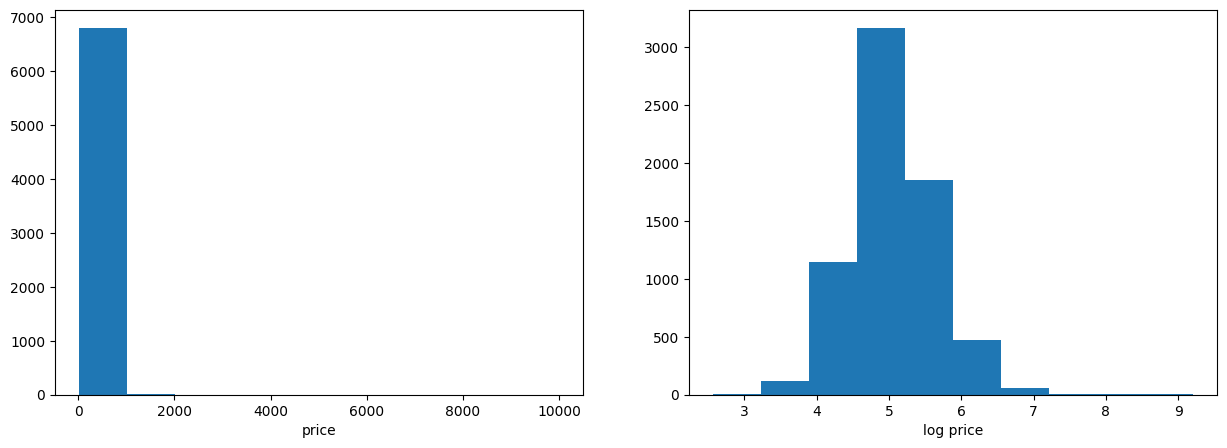

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df.price)
plt.xlabel('price')
plt.subplot(1,2,2)
plt.hist(df.log_price)
plt.xlabel('log price')
plt.show();

# **Machine Learning Model**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  Normalize and Split Dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['log_price','price'],axis=1),
                                                    df.log_price, test_size=0.25, random_state=5)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression Model**

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
lm_pred_train = lm.predict(X_train)
lm_pred_test = lm.predict(X_test)

lm_residual = y_test - lm_pred_test
lm_PE_train = np.divide((y_train - lm_pred_train), y_train) *100
lm_PE_test = np.divide((y_test - lm_pred_test), y_test) *100

metrics_lm_train = ['Train R2',  'Train RMSE','Train AAPE']

lm_train_results = [lm.score(X_train, y_train),
                         np.sqrt(mean_squared_error(y_train, lm_pred_train)),
                         np.mean(np.abs(lm_PE_train))]

for metric, result in zip(metrics_lm_train,lm_train_results):
    print(f'{metric}: {result}')

print()

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']

lm_test_results = [lm.score(X_test, y_test), np.sqrt(mean_squared_error(y_test, lm_pred_test)),
                  np.mean(np.abs(lm_PE_test))]

for metric, result in zip(metrics_test,lm_test_results):
    print(f'{metric}: {result}')

Train R2: 0.9875366922611453
Train RMSE: 0.0656124417349196
Train AAPE: 0.7835390951457512

Test R^2: -1.0458982717358464e+26
Test RMSE: 6125841226913.419
Test AAPE: 69376165746893.15


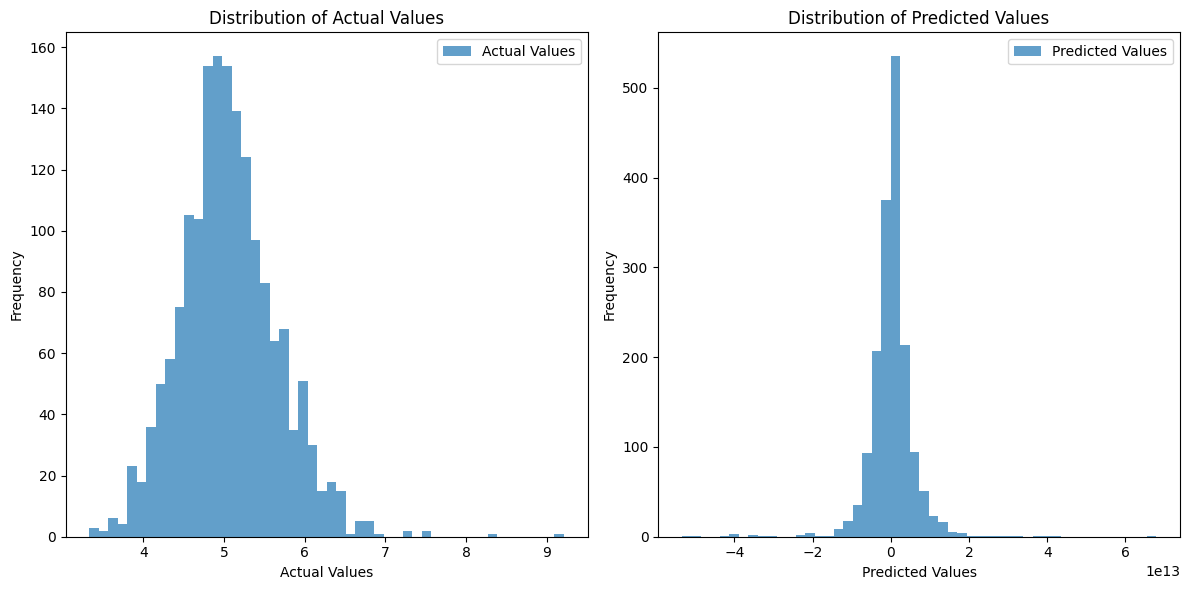

In [ ]:
# Plot histograms of the original and predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test, bins=50, label='Actual Values', alpha=0.7)
plt.title('Distribution of Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(lm_pred_test, bins=50, label='Predicted Values', alpha=0.7)
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


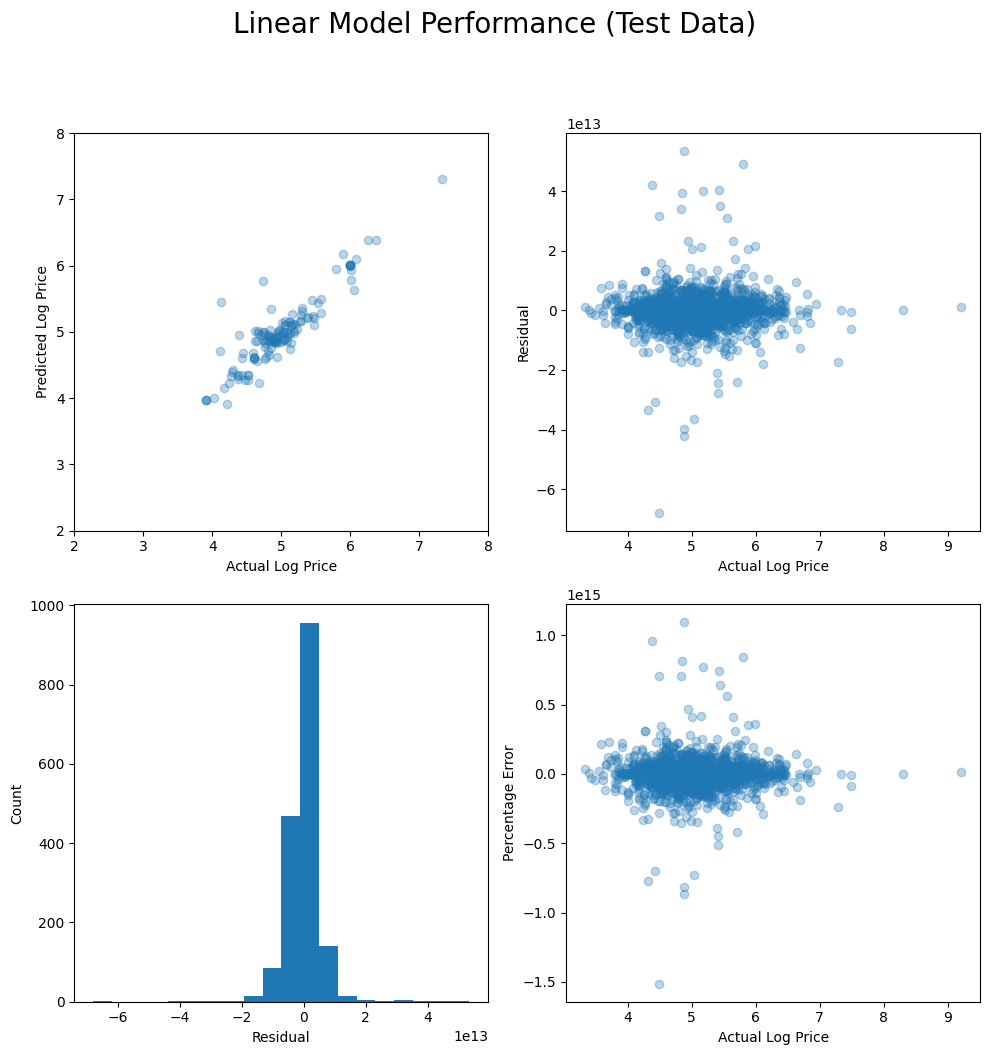

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,lm_pred_test, alpha=0.3)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.xlim([2,8])
plt.ylim([2,8])
plt.subplot(2,2,2)
plt.scatter(y_test,lm_residual, alpha = 0.3)
plt.xlabel('Actual Log Price')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(lm_residual, bins= 20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, lm_PE_test, alpha = 0.3)
plt.xlabel('Actual Log Price')
plt.ylabel('Percentage Error')
plt.suptitle('Linear Model Performance (Test Data)',y = 1.05,size=20)
plt.tight_layout()
plt.show()
#plt.savefig('final_report_figures/lm_diagnostics.png')

# **Random Forest**

In [38]:
from sklearn.ensemble import RandomForestRegressor
from collections import OrderedDict

In [ ]:
RANDOM_STATE = 5
N_ESTIMATORS = 150
ensemble_models = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(n_estimators= N_ESTIMATORS,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(n_estimators = N_ESTIMATORS,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(n_estimators = N_ESTIMATORS,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))]

oob_r2_dict = OrderedDict((label,[]) for label, _ in ensemble_models)

min_estimators = 25
max_estimators = N_ESTIMATORS

for label, model in ensemble_models:
    for i in range(min_estimators, max_estimators + 1):
        model.set_params(n_estimators = i)
        model.fit(X_train,y_train)

        oob_r2 = model.oob_score_
        oob_r2_dict[label].append((i,oob_r2))

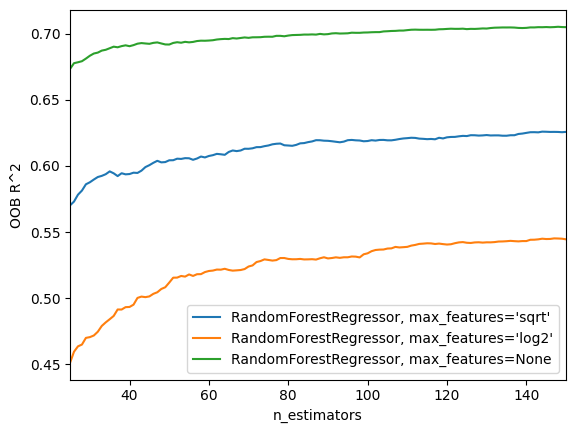

In [ ]:
import matplotlib.pyplot as plt
from collections import OrderedDict
# Assuming oob_r2_dict is properly defined before this code snippet

for label, model_r2 in oob_r2_dict.items():
    xs, ys = zip(*model_r2)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB R^2")
plt.legend(loc="lower right")
plt.savefig('rf_oob_1000.png')
plt.show()


# Model Development and Evaluation

In [ ]:
RANDOM_STATE = 5
rf = RandomForestRegressor(max_features=None,n_estimators=150, random_state = RANDOM_STATE)
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=None, n_estimators=150, random_state=5)

In [ ]:
rf_pred_test = rf.predict(X_test)

rf_residual = y_test - rf_pred_test
rf_PE_test = np.divide((y_test - rf_pred_test), y_test) *100


rf_test_results = [rf.score(X_test, y_test),np.sqrt(mean_squared_error(y_test, rf_pred_test)),
                  np.mean(np.abs(rf_PE_test))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']

for metric, result in zip(metrics_test,rf_test_results):
    print(f'{metric}: {result}')

Test R^2: 0.7228986953240212
Test RMSE: 0.315311854565203
Test AAPE: 4.3667455745335815


In [ ]:
rf_PE_test_unlog = np.divide(np.exp(y_test) - np.exp(rf_pred_test), np.exp(y_test)) *100

rf_test_results_unlog = [r2_score(np.exp(y_test), np.exp(rf_pred_test)),
                         np.sqrt(mean_squared_error(np.exp(y_test), np.exp(rf_pred_test))),
                         np.mean(np.abs(rf_PE_test_unlog))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']

for metric, result in zip(metrics_test,rf_test_results_unlog):
    print(f'{metric}: {result}')

Test R^2: 0.49052241452357837
Test RMSE: 208.25383817923813
Test AAPE: 22.48469742781358


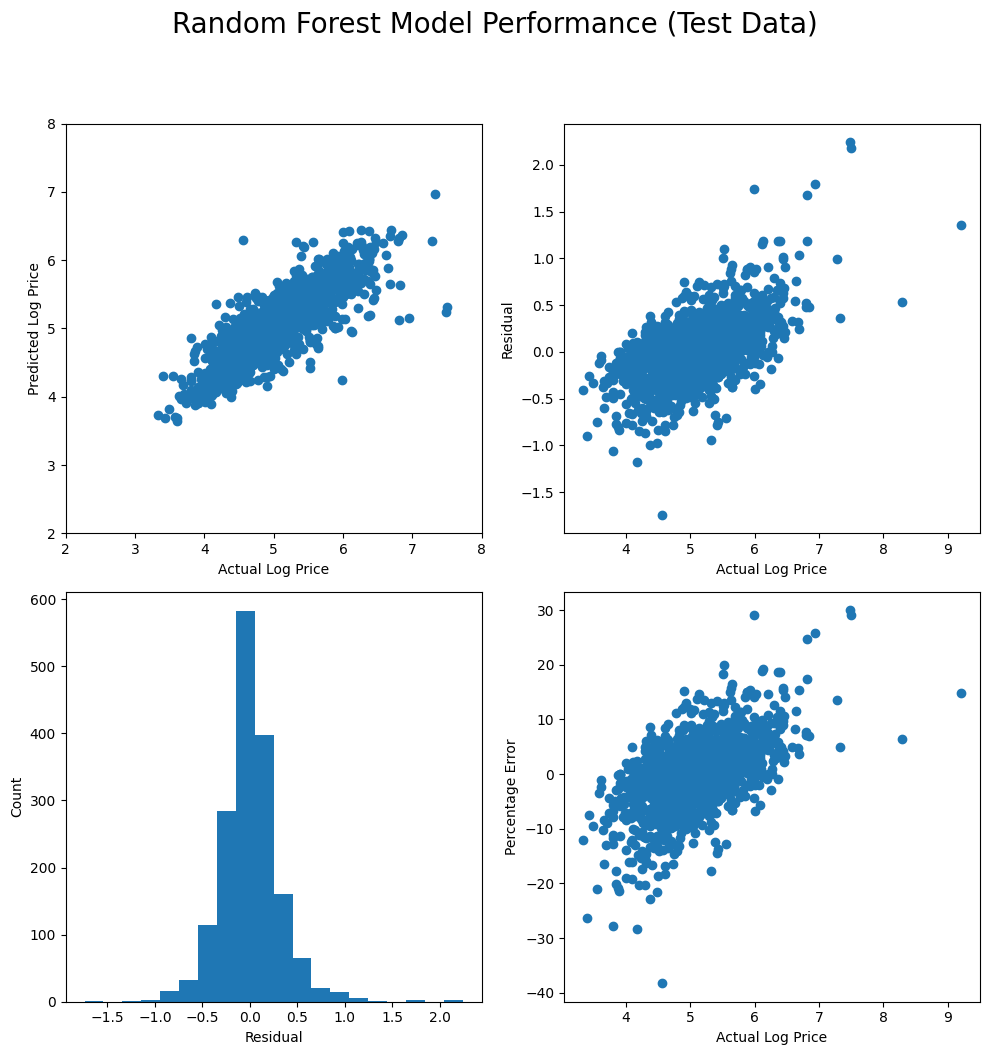

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,rf_pred_test)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.xlim([2,8])
plt.ylim([2,8])
plt.subplot(2,2,2)
plt.scatter(y_test,rf_residual)
plt.xlabel('Actual Log Price')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(rf_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, rf_PE_test)
plt.xlabel('Actual Log Price')
plt.ylabel('Percentage Error')
plt.suptitle('Random Forest Model Performance (Test Data)',y = 1.05, size=20)
plt.tight_layout()
plt.show()

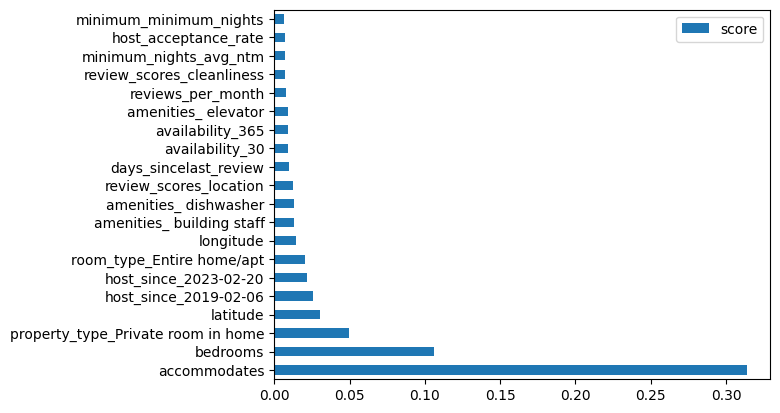

In [ ]:
rf_feature_importances = pd.DataFrame({'score':rf.feature_importances_},index = df.drop(['price','log_price'],axis=1).columns)
rf_feature_importances.sort_values('score',ascending=False)[:20].plot.barh();

# **Gradient boosting**

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# **Tune Moel**

We employ grid search to identify the optimal hyperparameters, focusing on adjusting the learning rate, maximum tree depth, and the quantity of features considered for each tree.

In [ ]:
## Grid Search with CV

RANDOM_STATE = 5

gb = GradientBoostingRegressor(warm_start = True, random_state = RANDOM_STATE)
param_grid = {'learning_rate':[0.01 ,0.1, 1], 'n_estimators':[150],
              'max_depth': [2, 5], 'max_features' :[None, 'sqrt','log2']}
cv_gb = GridSearchCV(estimator=gb,param_grid=param_grid,cv=3)
cv_gb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(random_state=5,
                                                 warm_start=True),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [2, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [150]})

In [ ]:
gb_best_params = cv_gb.best_params_
gb_best_params

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': None,
 'n_estimators': 150}

**Model Development and Evaluation**

In [ ]:
# Build GBM model
gb = GradientBoostingRegressor(learning_rate=gb_best_params['learning_rate'],
                               max_depth=gb_best_params['max_depth'],
                               max_features = gb_best_params['max_features'],
                               n_estimators = gb_best_params['n_estimators'],warm_start=True, random_state=RANDOM_STATE)
gb.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=5,
                          warm_start=True)

In [ ]:
gb_pred_test = gb.predict(X_test)
gb_residual = y_test - gb_pred_test
gb_PE_test = np.divide((y_test - gb_pred_test), y_test) *100

gb_test_results = [gb.score(X_test, y_test),np.sqrt(mean_squared_error(y_test, gb_pred_test)),
                  np.mean(np.abs(gb_PE_test))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']

for metric, result in zip(metrics_test,gb_test_results):
    print(f'{metric}: {result}')

Test R^2: 0.7486747009012436
Test RMSE: 0.3002887884148752
Test AAPE: 4.28700755834602


The model shows slight improvement over the random forest model with higher R^2, and lower RMSE and AAPE.



In [ ]:
gb_PE_test_unlog = np.divide(np.exp(y_test) - np.exp(gb_pred_test), np.exp(y_test)) *100

gb_test_results_unlog = [r2_score(np.exp(y_test), np.exp(gb_pred_test)),
                         np.sqrt(mean_squared_error(np.exp(y_test), np.exp(gb_pred_test))),
                         np.mean(np.abs(gb_PE_test_unlog))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']

for metric, result in zip(metrics_test,gb_test_results_unlog):
    print(f'{metric}: {result}')

Test R^2: 0.584691610464507
Test RMSE: 188.02509877461924
Test AAPE: 21.76743119898006


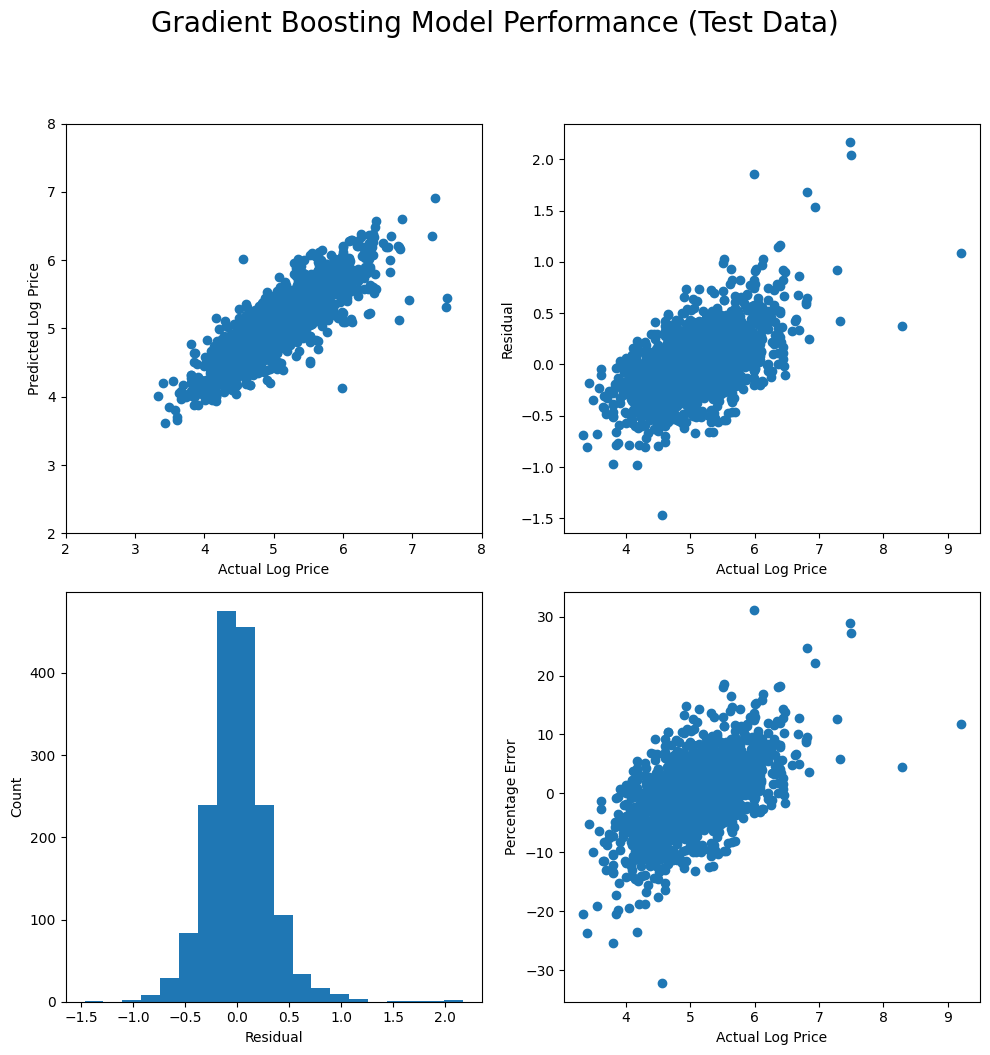

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,gb_pred_test)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.xlim([2,8])
plt.ylim([2,8])
plt.subplot(2,2,2)
plt.scatter(y_test,gb_residual)
plt.xlabel('Actual Log Price')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(gb_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, gb_PE_test)
plt.xlabel('Actual Log Price')
plt.ylabel('Percentage Error')
plt.suptitle('Gradient Boosting Model Performance (Test Data)',y = 1.05, size=20)
plt.tight_layout()
plt.show()

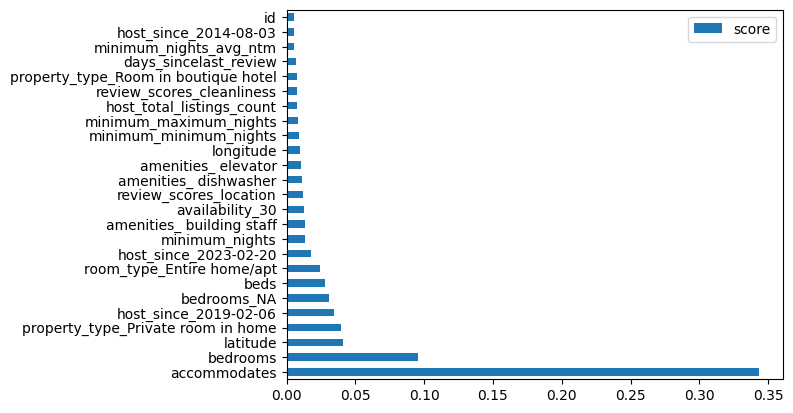

In [ ]:
gb_feature_importances = pd.DataFrame({'score':gb.feature_importances_},index = df.drop(['price','log_price'],axis=1).columns)
gb_feature_importances.sort_values('score',ascending=False)[:25].plot.barh();

# **XGBoost**

In [19]:
import xgboost as xgb

In [26]:
xg = xgb.XGBRegressor(random_state=5)
xg_param_grid = {'colsample_bytree': [0.5, 0.75, 1], 'n_estimators': [100], 'max_depth': [2, 5]}

xg_cv = GridSearchCV(estimator=xg,param_grid=xg_param_grid,cv=5,verbose=1)

In [27]:
xg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=5, ...),
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'max_depth': [2, 5], 'n_estimators': [100]},
             verbose=1)

In [28]:
xg_best_params = xg_cv.best_params_
xg_best_params

{'colsample_bytree': 1, 'max_depth': 5, 'n_estimators': 100}

In [29]:
xg = xgb.XGBRegressor(colsample_bytree = xg_best_params['colsample_bytree'], n_estimators = xg_best_params['n_estimators'],
                 max_depth = xg_best_params['max_depth'])

xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [30]:
xg_pred_test = xg.predict(X_test)
xg_residual = y_test - xg_pred_test
xg_PE_test = np.divide((y_test - xg_pred_test), y_test) *100

xg_test_results = [xg.score(X_test, y_test),np.sqrt(mean_squared_error(y_test, xg_pred_test)),
                  np.mean(np.abs(xg_PE_test))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']

for metric, result in zip(metrics_test,xg_test_results):
    print(f'{metric}: {result}')

Test R^2: 0.7429675050176376
Test RMSE: 0.3036791880600823
Test AAPE: 4.35774623618614


In [31]:
xg_PE_test_unlog = np.divide(np.exp(y_test) - np.exp(xg_pred_test), np.exp(y_test)) *100

xg_test_results_unlog = [r2_score(np.exp(y_test), np.exp(xg_pred_test)),
                         np.sqrt(mean_squared_error(np.exp(y_test), np.exp(xg_pred_test))),
                         np.mean(np.abs(xg_PE_test_unlog))]

metrics_test = ['Test R^2',  'Test RMSE','Test AAPE']

for metric, result in zip(metrics_test,xg_test_results_unlog):
    print(f'{metric}: {result}')

Test R^2: 0.7868736841181286
Test RMSE: 134.69423630445797
Test AAPE: 22.213259342924335


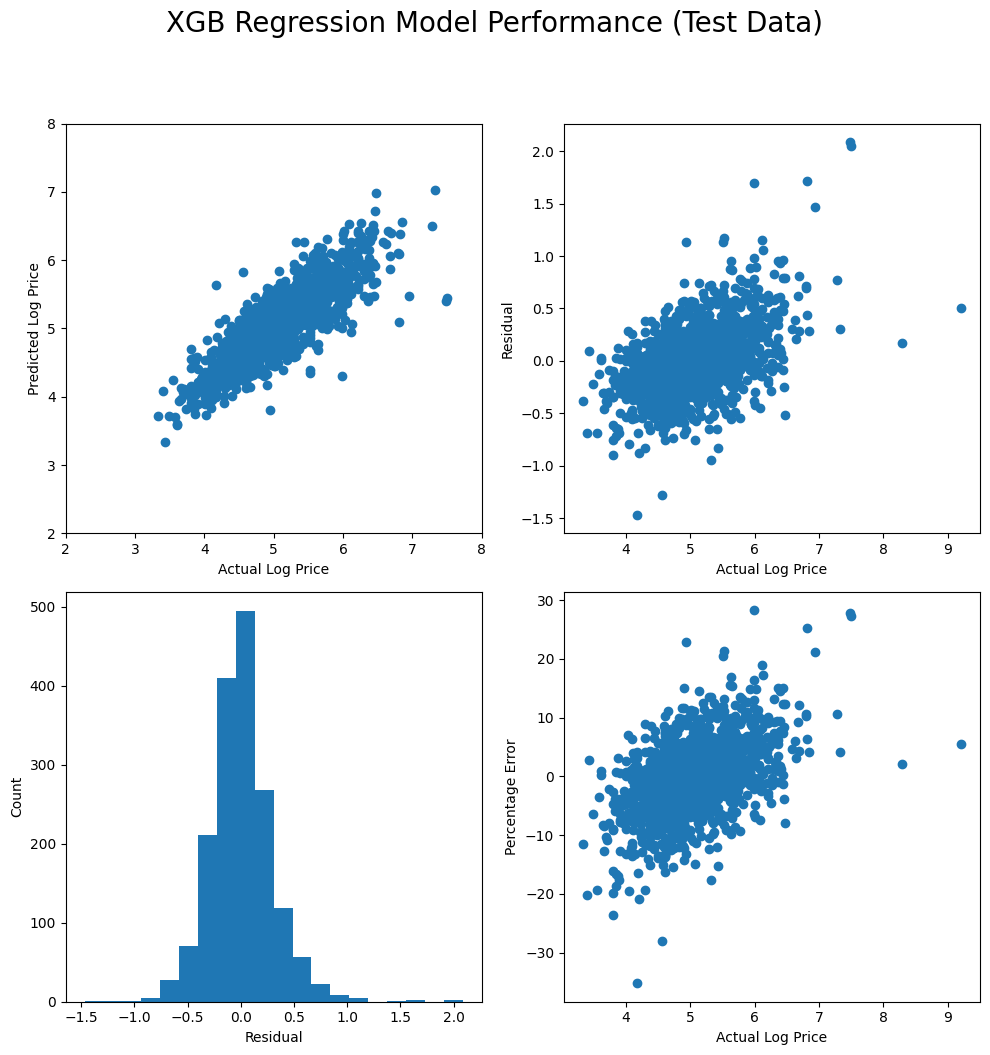

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(y_test,xg_pred_test)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.xlim([2,8])
plt.ylim([2,8])
plt.subplot(2,2,2)
plt.scatter(y_test,xg_residual)
plt.xlabel('Actual Log Price')
plt.ylabel('Residual')
plt.subplot(2,2,3)
plt.hist(xg_residual, bins=20)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.subplot(2,2,4)
plt.scatter(y_test, xg_PE_test)
plt.xlabel('Actual Log Price')
plt.ylabel('Percentage Error')
plt.suptitle('XGB Regression Model Performance (Test Data)',y = 1.05, size=20)
plt.tight_layout()
plt.show()

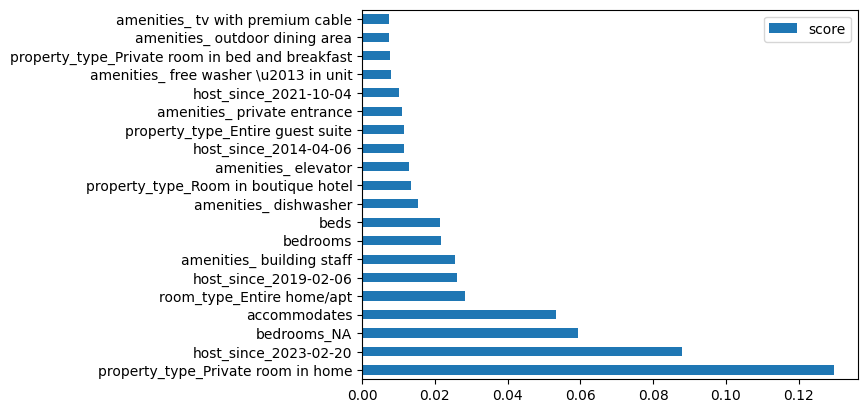

In [33]:
xg_feature_importances = pd.DataFrame({'score':xg.feature_importances_},index = df.drop(['price','log_price'],axis=1).columns)
xg_feature_importances.sort_values('score',ascending=False)[:20].plot.barh();

# **Model Comparison**

In [49]:
summary = OrderedDict({"Linear Regression": lm_test_results, "Random Forest": rf_test_results,
                                   'Gradient Boosting': gb_test_results, "XG Boosting": xg_test_results})
df_model_comparison = pd.DataFrame(summary, index=['R^2','RMSE','AAPE'])
print("Model Performances (Log Price)")
df_model_comparison

In [49]:
summary = OrderedDict({"Linear Regression": lm_test_results, "Random Forest": rf_test_results_unlog,
                                   'Gradient Boosting': gb_test_results_unlog, "XG Boosting": xg_test_results_unlog})
df_model_comparison = pd.DataFrame(summary, index=['R^2','RMSE','AAPE'])
print("Model Performances (Price)")
df_model_comparison

In [44]:
# Printing the model comparison
print("Model Comparison (Test Results)")
print(df_model_comparison)

Model Comparison (Test Results)
                   Test R^2  Test RMSE  Test AAPE
Random Forest      0.722899   0.315312   4.366746
Gradient Boosting  0.748675   0.300289   4.287008
XGBoost            0.742968   0.303679   4.357746


<ipython-input-49-c0524628585b>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_model_comparison, x='Model', y='Test R^2', palette="viridis")


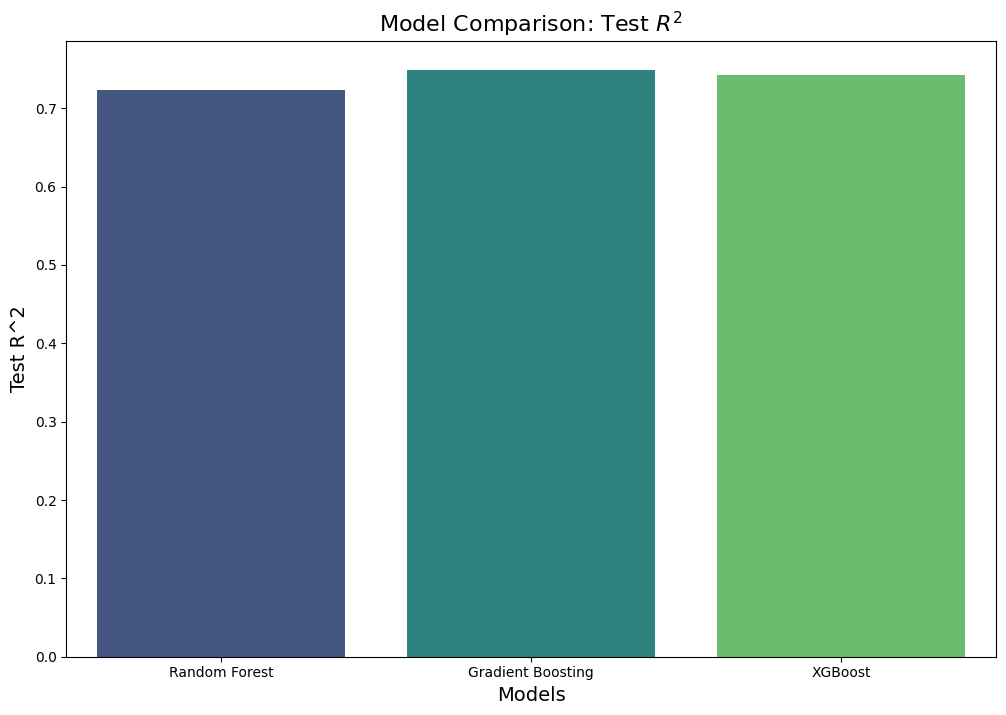

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Test results for different models
linear_regression_results = {
    'Model': 'Linear Regression',
    'Test R^2': -1.0458982717358464e+26,
    'Test RMSE': 6125841226913.419,
    'Test AAPE': 69376165746893.15
}

random_forest_results = {
    'Model': 'Random Forest',
    'Test R^2': 0.7228986953240212,
    'Test RMSE': 0.315311854565203,
    'Test AAPE': 4.3667455745335815
}

gradient_boosting_results = {
    'Model': 'Gradient Boosting',
    'Test R^2': 0.7486747009012436,
    'Test RMSE': 0.3002887884148752,
    'Test AAPE': 4.28700755834602
}

xgboost_results = {
    'Model': 'XGBoost',
    'Test R^2': 0.7429675050176376,
    'Test RMSE': 0.3036791880600823,
    'Test AAPE': 4.35774623618614
}

# Creating a DataFrame for model comparison
df_model_comparison = pd.DataFrame([
    random_forest_results,
    gradient_boosting_results,
    xgboost_results
])

# Plotting a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df_model_comparison, x='Model', y='Test R^2', palette="viridis")
plt.title('Model Comparison: Test $R^2$', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Test R^2', fontsize=14)
plt.show()


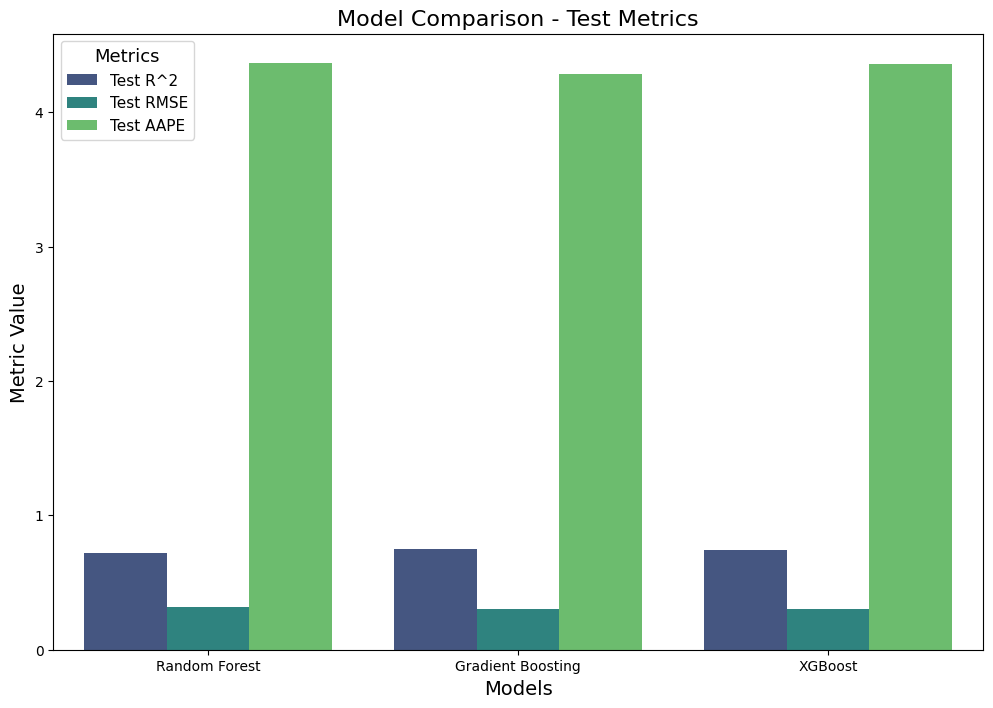

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Test results for different models
linear_regression_results = {
    'Model': 'Linear Regression',
    'Test R^2': -1.0458982717358464e+26,
    'Test RMSE': 6125841226913.419,
    'Test AAPE': 69376165746893.15
}

random_forest_results = {
    'Model': 'Random Forest',
    'Test R^2': 0.7228986953240212,
    'Test RMSE': 0.315311854565203,
    'Test AAPE': 4.3667455745335815
}

gradient_boosting_results = {
    'Model': 'Gradient Boosting',
    'Test R^2': 0.7486747009012436,
    'Test RMSE': 0.3002887884148752,
    'Test AAPE': 4.28700755834602
}

xgboost_results = {
    'Model': 'XGBoost',
    'Test R^2': 0.7429675050176376,
    'Test RMSE': 0.3036791880600823,
    'Test AAPE': 4.35774623618614
}

# Creating a DataFrame for model comparison
df_model_comparison = pd.DataFrame([
    random_forest_results,
    gradient_boosting_results,
    xgboost_results
])

# Melt the DataFrame for easier plotting
df_model_comparison_melted = pd.melt(df_model_comparison, id_vars='Model', var_name='Metric', value_name='Value')

# Plotting a grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df_model_comparison_melted, x='Model', y='Value', hue='Metric', palette="viridis")
plt.title('Model Comparison - Test Metrics', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.legend(title='Metrics', title_fontsize='13', fontsize='11')
plt.show()


# **Summary**

**Summary: Predicting Nightly Price of Airbnb Listings in Seattle, Washington**

In our endeavor to predict nightly prices for Airbnb listings in Seattle, Washington, we meticulously executed a comprehensive data science workflow. This involved Exploratory Data Analysis (EDA), data preprocessing, feature engineering, and the evaluation of multiple machine learning models. Here's a detailed summary of the process and a careful examination of the model comparison results:

### Methodology:

1. **Exploratory Data Analysis (EDA):**
   - Uncovered insights into feature distributions and relationships within the dataset.

2. **Data Preprocessing:**
   - Addressed missing values, outliers, and executed essential data transformations for modeling.

3. **Feature Engineering:**
   - Extracted meaningful features and introduced new variables to enhance model predictive capabilities.

4. **Model Selection:**
   - Explored a range of machine learning algorithms, considering the dataset's characteristics.
   - Considered linear regression, random forests, gradient boosting, and XGBoost for their potential to capture intricate patterns.

5. **Hyperparameter Tuning:**
   - Employed grid search to fine-tune hyperparameters, with a specific focus on learning rate, max tree depth, and the number of features considered.

### Model Comparison Results:

The performance of the machine learning models was assessed using key metrics, and the results are detailed below:

- **Random Forest:**
  - Test R^2: 0.7229
  - Test RMSE: 0.3153
  - Test AAPE: 4.3667

- **Gradient Boosting:**
  - Test R^2: 0.7487
  - Test RMSE: 0.3003
  - Test AAPE: 4.2870

- **XGBoost:**
  - Test R^2: 0.7430
  - Test RMSE: 0.3037
  - Test AAPE: 4.3577

### Model Comparison Visualization:

A grouped bar chart vividly illustrates the comparative performance of models across different metrics. Notably, Gradient Boosting exhibits the highest R^2 value among the models, indicating a superior ability to explain the variability in nightly prices.

### Best Model:

**Gradient Boosting is identified as the most effective model** based on the highest R^2 value. This signifies that Gradient Boosting captures a larger proportion of the variance in nightly prices, resulting in more accurate predictions compared to other models.

The choice of Gradient Boosting is supported not only by its superior R^2 but also its competitive RMSE and AAPE metrics. The ensemble learning nature of Gradient Boosting, which combines the strength of multiple weak learners, contributes to its robust performance.

In conclusion, the detailed data science process, coupled with a thorough model comparison, indicates that **Gradient Boosting is the recommended model for predicting nightly prices** in this specific Airbnb dataset.